In [7]:
import sympy as sym
from sympy.utilities.lambdify import lambdify
from functools import partial
from itertools import product
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [8]:
%matplotlib inline
sym.init_printing(use_unicode=True)
mpl.style.use('seaborn-talk')


In [42]:
x, t, z, = sym.symbols('x t z')
pi, psi, phi,theta1, theta2 = sym.symbols('pi, psi, phi theta_1, theta_2', real=True)
c, rho, delta = sym.symbols('c, rho, delta', positive=True, real=True)

## Define the relevant variables

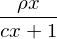

In [10]:
a = (rho * x) / (1 + c * x)
a

In [11]:
b = delta * sym.log(1 + c * x)
b

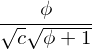

In [12]:
ratio1 = phi / sym.sqrt(c * ( 1 + phi))
ratio1

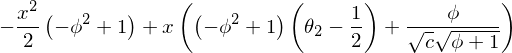

In [13]:
alpha = x * (ratio1 + (1-phi**2)*(theta2 - sym.Rational(1,2))) - sym.Rational(1/2) * x**2 * (1-phi**2)
alpha

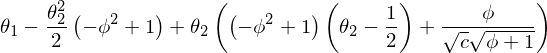

In [14]:
arg1 = theta1 + alpha.replace(x, theta2)
arg1

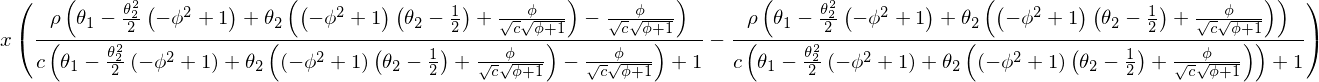

In [15]:
beta = x * (a.replace(x, - ratio1 + arg1) - a.replace(x, arg1))
beta

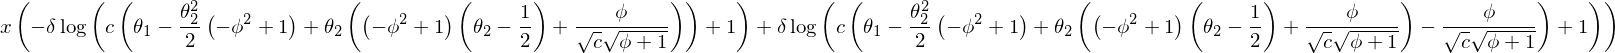

In [16]:
gamma = x * (b.replace(x, - ratio1 + arg1) - b.replace(x, arg1))
gamma

In [17]:
gamma.replace(c,1).replace(delta, 1).replace(phi, -.2)

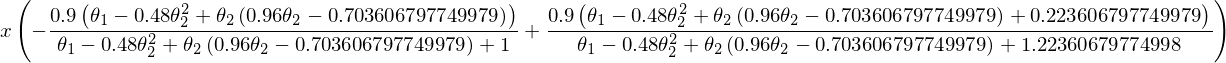

In [18]:
beta.replace(c,1).replace(delta, 1).replace(rho, .9).replace(phi, -.2)

## I now take the derivatives

### a(x)

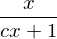

In [19]:
a.diff(rho,1)

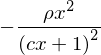

In [20]:
a.diff(c, 1)

### b(x)

In [21]:
b.diff(delta, 1)

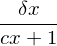

In [22]:
b.diff(c, 1)

### $\alpha(x)$

In [23]:
theta2val = sym.solveset(alpha.diff(phi, 1), theta2).args[0]

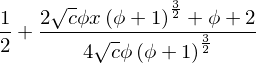

In [24]:
theta2val

In [25]:
alpha.diff(theta2, 1)

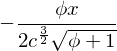

In [26]:
alpha.diff(c, 1)

### $\beta(x)$

In [27]:
beta.diff(phi, 1).simplify()

KeyboardInterrupt: 

In [ ]:
beta.diff(phi,1)

In [ ]:
beta.diff(c,1)

In [ ]:
sym.diff(beta, theta1)

In [ ]:
sym.diff(beta, theta2)

### $\gamma(x)$

In [ ]:
sym.diff(gamma, phi)

In [ ]:
sym.sympify(sym.diff(gamma, theta1).replace(theta2,theta2val).replace(x,1))

In [ ]:
theta2val

In [ ]:
sym.diff(gamma, theta2)

In [ ]:
sym.diff(gamma, delta)

## Lack of identification issue

In [ ]:
sym.diff(gamma.replace(phi, 0), theta1)

In [ ]:
sym.diff(beta.replace(phi, 0), theta1)

In [ ]:
sym.diff(gamma.replace(theta1, 0), theta2)

### Parameter Estimates from Renault (Gmm Step)

rho : 0.95
delta : 1.25
phi : -0.30
theta2 : 0.53

sym.diff(gamma, theta1).replace(phi, 0)

In [ ]:
gamma_func = partial(lambdify((c, delta, rho, theta2, theta1, x, phi), sym.diff(gamma, theta1)),
                     1, 1.25, .95, .53, -7, .5)

In [ ]:
gamma_diff_fig, gamma_diff_ax = mpl.pyplot.subplots()
xvals = np.linspace(-.99, .99, 100)
yvals = [gamma_func(val) for val in xvals]
gamma_diff_ax.set_xlabel('$\phi$')
gamma_diff_ax.plot(xvals, yvals)
gamma_diff_ax.axhline(0, color='grey')
gamma_diff_ax.axvline(0, color='grey')
gamma_diff_ax.set_yticklabels([])
gamma_diff_fig.savefig('../doc/figures/gamma_diff_theta2.tmp.pdf', frameon=False, transparent=True,
                       bbox_inches='tight',pad_inches=0)

In [ ]:
beta_func = partial(lambdify((c, delta, rho, theta2, theta1, x, phi), sym.diff(beta, theta1)),
                     1, 1.25, .95, .53, -7, .5)

In [ ]:
beta_diff_fig, beta_diff_ax = mpl.pyplot.subplots()
beta_xvals = np.linspace(-.99, .99, 100)
beta_yvals = [beta_func(val) for val in xvals]
beta_diff_ax.set_ylabel('$\phi$')
beta_diff_ax.plot(xvals, yvals)
beta_diff_ax.axhline(0, color='grey')
beta_diff_ax.axvline(0, color='grey')

### Solving for $\psi$

In [64]:
phi

In [65]:
pi, psi, phi,theta, alpha = sym.symbols('pi, psi, phi theta, alpha', real=True)


In [66]:
alpha = psi * x + (1 - phi**2 / 2) * x**2

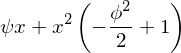

In [67]:
alpha

In [68]:
c

In [69]:
chi = 1 + c * (pi + alpha.replace(x,theta))

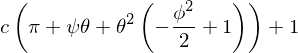

In [70]:
chi

In [76]:
sym.Rational(3/2)

In [86]:
umm = -psi + (phi * chi**sym.Rational(3/2)) / (sym.sqrt(c) * sym.sqrt(chi**2 - rho)) + (1 - phi**2) /2 - ( 1 - phi**2) * theta

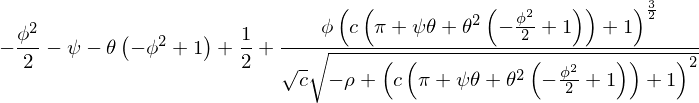

In [87]:
umm

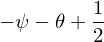

In [96]:
umm.replace(phi, 0)

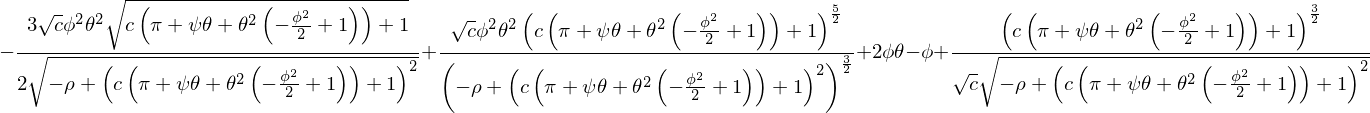

In [97]:
umm.diff(phi)

In [71]:
sym.solveset(-psi + phi / sym.sqrt((c / chi) * (3 - rho / chi**2)) + (1 - phi**2) / 2 - ( 1 - phi**2) * theta, psi)

KeyboardInterrupt: 

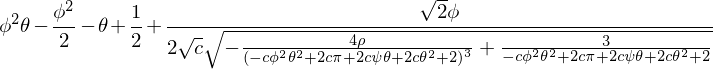

In [55]:
psi.simplify()